## Computer Vision Project : How to detect value of resistor from image

* What is imaging processing?
* What is computer vision?
* How computer can see image?


Project
* Install Libraries
* What is Region Of Interset (ROI)? How I Can Find?

#### Step 1 : Install Libraries

In [36]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#### Step 2: What is Region Of Interset (ROI)? How I Can Find?
    * Using Color Detector 
    * Using Shape Detector
    * Using Classification methods such as Deep Learning [Build Classifer] 

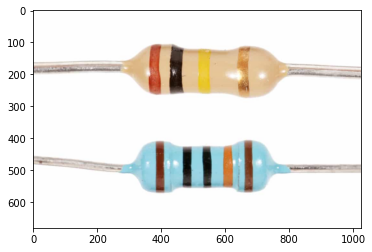

In [37]:
image = cv.imread("resistor2.jpg")
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

#### So why HSV?

HSV color space is useful when we’re working with color information. It stands for HUE, SATURATION, and VALUE (or brightness). It is a cylindrical color space.

    HUE: The hues are modeled as an angular dimension that encodes color information.
    SATURATION: Saturation encodes the intensity of color.
    VALUE: Value represents the amount to which that respective color is mixed with black.

In [38]:
![rbg_and_hsv_system](folder_path/picture_name.png)

'[rbg_and_hsv_system]' is not recognized as an internal or external command,
operable program or batch file.


#### SETP 1 : convert to HSV colorspace

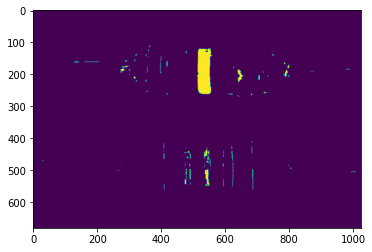

In [39]:
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# lower bound and upper bound for Green color
lower_bound = np.array([50, 20, 20])   
upper_bound = np.array([100, 255, 255])
# lower_black = np.array([0, 0, 0])
# upper_black = np.array([350,55,100])
# find the colors within the boundaries
mask = cv.inRange(hsv, lower_bound, upper_bound)
plt.imshow(mask)
plt.show()

#### SETP 2 : Remove unnecessary noise from mask

Explanation:

np.ones((7,7),np.uint8) create a 5×5 8 bit integer matrix.
cv.MORPH_CLOSE removes unnecessary black noises from the white region.
cv.MORPH_OPEN removes white noise from the black region of the mask.

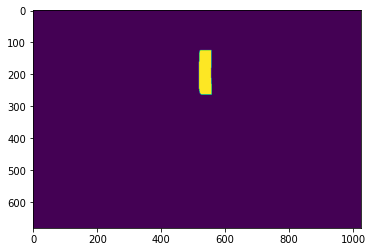

In [42]:

kernel = np.ones((32,32),np.uint8)

mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

plt.imshow(mask)
plt.show()

#### STEP 3 : Draw a Boundary of the detected objects


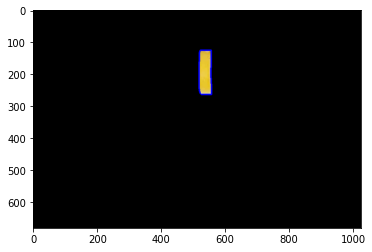

In [43]:
segmented_img = cv.bitwise_and(image, image, mask=mask)

contours, hierarchy = cv.findContours(mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
output = cv.drawContours(segmented_img, contours, -1, (0, 0, 255), 3)
# Showing the output
plt.imshow(output)
plt.show()

### Summary
In this project, we’ve created a basic object detector using OpenCV Python. Here we implemented the Color detection and Segmentation Technique. We learned about colors, color filtering techniques, contour detection, and some segmentation techniques.


### Limitation 

##### 1. Run with real-time approach